In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv('https://raw.githubusercontent.com/teeloren/graduation-outcomes/main/mcu_box_office.csv')
# Source: https://www.kaggle.com/datasets/davidgdong/marvel-cinematic-universe-box-office-dataset?select=mcu_box_office.csv

print(data.duplicated().any())
print(data.isnull().values.any())
data.info()
data

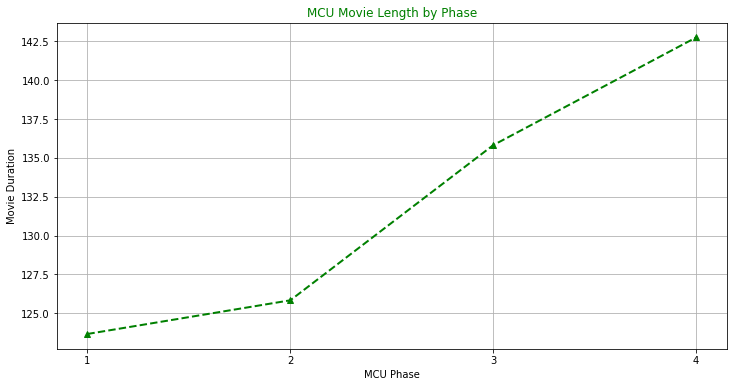

In [43]:

phase = data.groupby(['mcu_phase']).mean()
# plt.figure(figsize=(12,6))
plt.plot(phase['movie_duration'], '^--', c='g', lw=2)
plt.xticks(np.arange(1, 5, step=1))
plt.xlabel('MCU Phase')
plt.ylabel('Movie Duration')
plt.title('MCU Movie Length by Phase', c='g')
plt.grid(True)
plt.savefig('mcu_line.jpg')
plt.show()

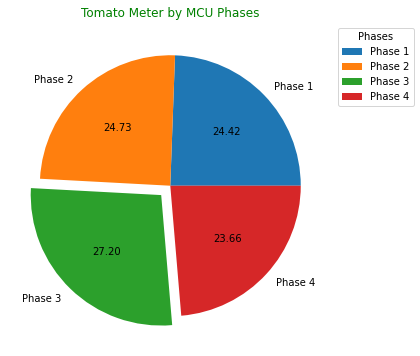

In [44]:
labels=['Phase 1','Phase 2','Phase 3','Phase 4']
explode=[0,0,.1,0]
phase = data.groupby(['mcu_phase']).mean()
# plt.figure(figsize=(12,6))
plt.pie(phase['tomato_meter'], labels=labels, autopct='%.2f', explode=explode)
plt.title('Tomato Meter by MCU Phases', c='g')
plt.grid(True)
plt.legend(title='Phases',labels=labels, bbox_to_anchor=[1, 1])
plt.savefig('mcu_pie.png')
plt.show()

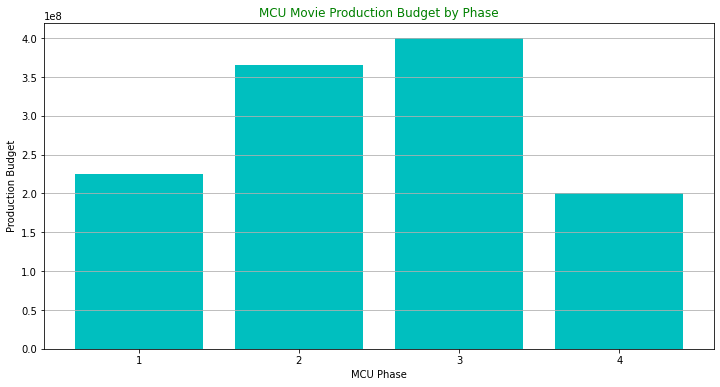

In [54]:
# plt.figure(figsize=(12,6))
plt.bar(data['mcu_phase'], data['production_budget'], color='c')
plt.xticks(np.arange(1, 5, step=1))
plt.xlabel('MCU Phase')
plt.ylabel('Production Budget')
plt.title('MCU Movie Production Budget by Phase', c='g')
plt.grid(axis='y')
plt.savefig('mcu_bar.jpg')
plt.show()

In [46]:
data.corr()

,mcu_phase,tomato_meter,audience_score,movie_duration
mcu_phase,1.000000,0.115278,0.290832,0.436997
tomato_meter,0.115278,1.000000,0.530359,0.135961
audience_score,0.290832,0.530359,1.000000,0.363841
movie_duration,0.436997,0.135961,0.363841,1.000000


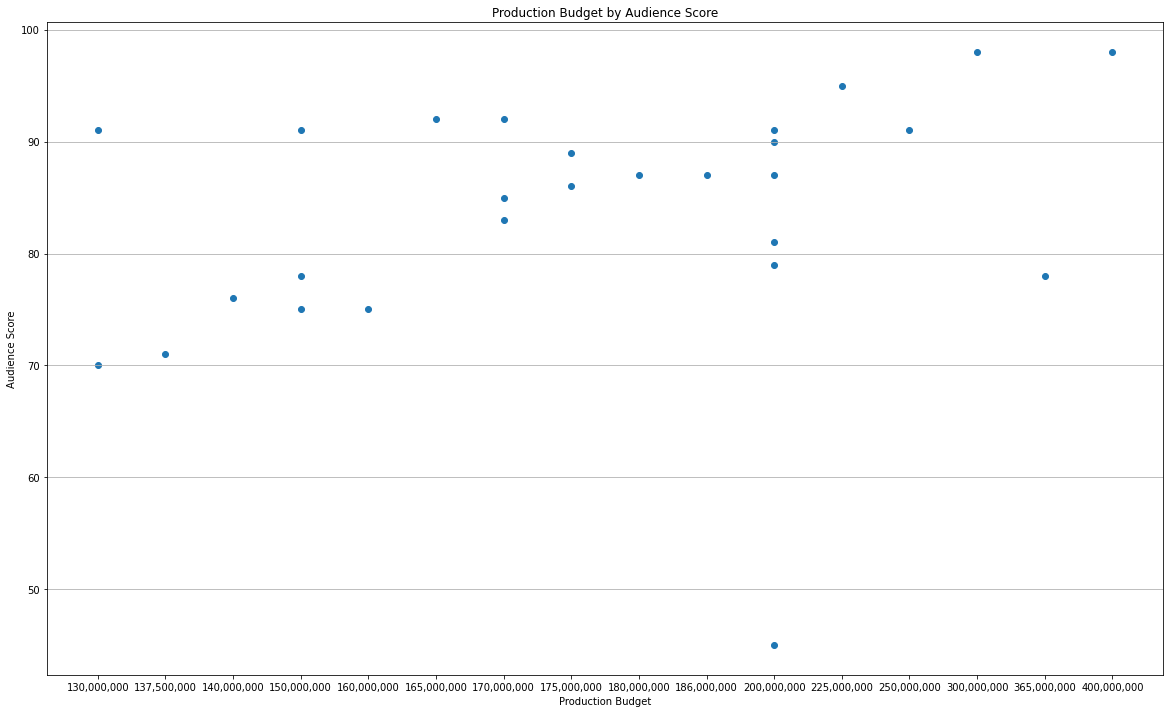

In [47]:
# plt.figure(figsize=(20,12))
plt.scatter(sorted(data['production_budget']),(data['audience_score']))
plt.xlabel('Production Budget')
plt.ylabel('Audience Score')
plt.grid(axis='y')
plt.title('Production Budget by Audience Score')
plt.savefig('mcu_scatter.png')
plt.show()

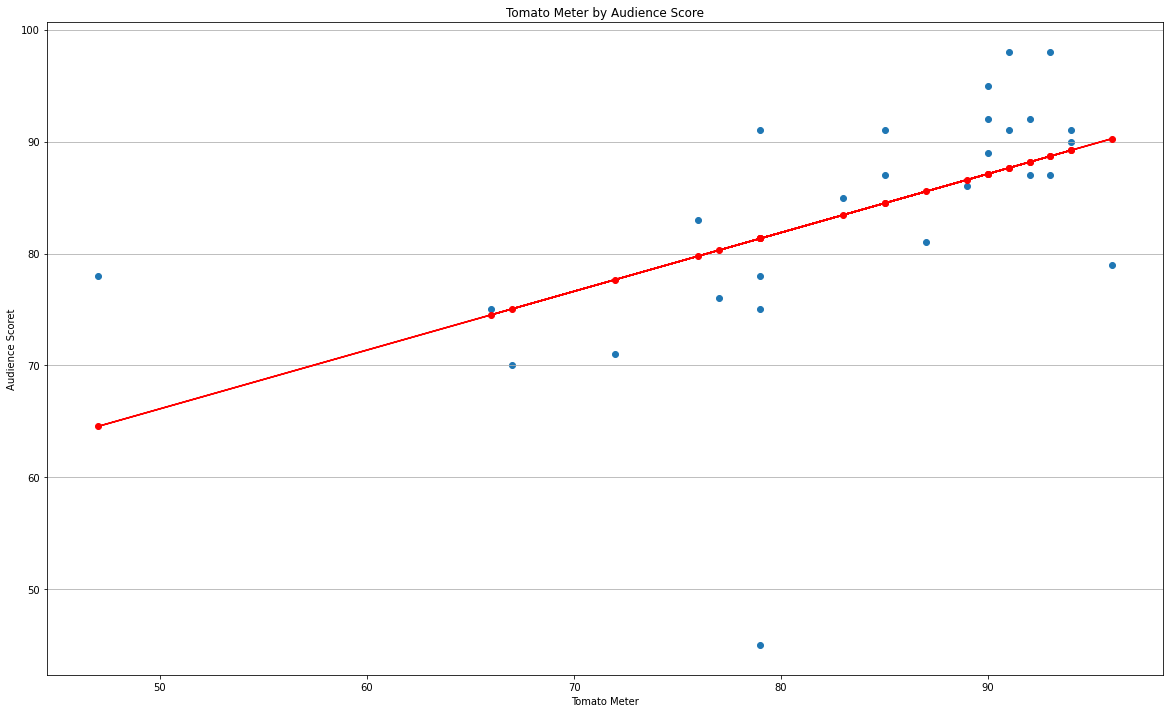

In [48]:
x = data['tomato_meter']
y = data['audience_score']

#calculate equation for trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# plt.figure(figsize=(20,12))
plt.scatter(x,y)
plt.xlabel('Tomato Meter')
plt.ylabel('Audience Scoret')
plt.grid(axis='y')
plt.title('Tomato Meter by Audience Score')
plt.plot(x, p(x), "r-o")
plt.show()



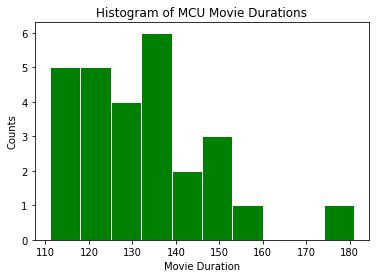

In [55]:

plt.hist(data['movie_duration'], color='g', edgecolor='w')
plt.ylabel('Counts')
plt.xlabel('Movie Duration')
plt.title('Histogram of MCU Movie Durations')
plt.savefig('mcu_hist.png')
plt.show()

In [50]:

# RangeIndex: 27 entries, 0 to 26
# Data columns (total 10 columns):
########int64(4),  
#  1   mcu_phase             27 non-null     int64
#  3   tomato_meter          27 non-null     int64 
#  4   audience_score        27 non-null     int64 
#  5   movie_duration        27 non-null     int64 

#########object(6)
#  0   movie_title           27 non-null     object
#  2   release_date          27 non-null     object
#  6   production_budget     27 non-null     object
#  7   opening_weekend       27 non-null     object
#  8   domestic_box_office   27 non-null     object
#  9   worldwide_box_office  27 non-null     object


In [51]:
data['production_budget'] = data['production_budget'].str.replace(",", "").astype(float)
data['opening_weekend'] = data['opening_weekend'].str.replace(",", "").astype(float)
data['domestic_box_office'] = data['domestic_box_office'].str.replace(",", "").astype(float)

In [52]:
data.corr()

,mcu_phase,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office
mcu_phase,1.000000,0.115278,0.290832,0.436997,0.164697,0.207150,0.221170
tomato_meter,0.115278,1.000000,0.530359,0.135961,0.129395,0.367428,0.482284
audience_score,0.290832,0.530359,1.000000,0.363841,0.211768,0.183380,0.242755
movie_duration,0.436997,0.135961,0.363841,1.000000,0.798259,0.769969,0.690246
production_budget,0.164697,0.129395,0.211768,0.798259,1.000000,0.819052,0.688485
opening_weekend,0.207150,0.367428,0.183380,0.769969,0.819052,1.000000,0.955359
domestic_box_office,0.221170,0.482284,0.242755,0.690246,0.688485,0.955359,1.000000


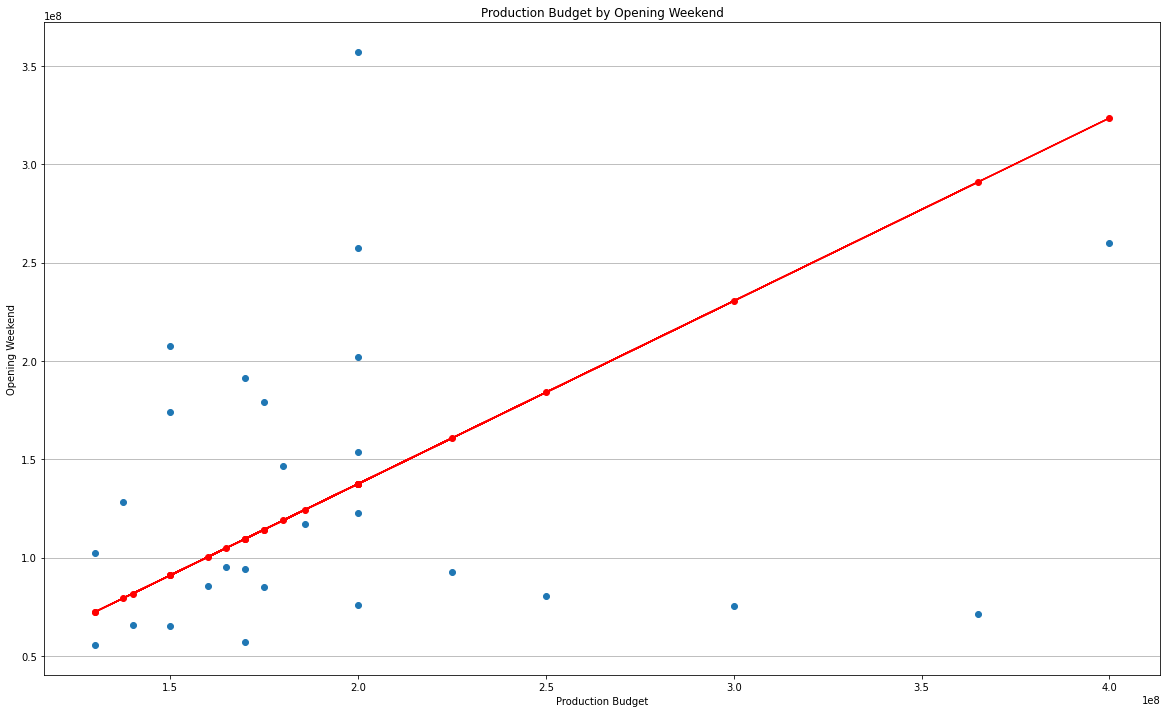

In [53]:
x=data['production_budget']
y=data['opening_weekend']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.figure(figsize=(20,12))
plt.scatter(sorted(x),(y))
plt.xlabel('Production Budget')
plt.ylabel('Opening Weekend')
plt.grid(axis='y')
plt.title('Production Budget by Opening Weekend')
plt.plot(x, p(x), "r-o")
plt.show()



